# Part 1

## 1.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2

In [2]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_sample_data_missing_vals_new.csv', index_col = 0)
d.head()
d.columns
print('list of columns name:',d.columns)
print(d.head())

list of columns name: Index(['weight_kg', 'overall_length_mm', 'variety', 'avg_rating'], dtype='object')
   weight_kg  overall_length_mm  variety  avg_rating
0        NaN         291.068237        1  216.921532
1   0.008966         178.648431        1  314.967587
2   0.003654                NaN        1  178.361162
3        NaN         130.146299        0  476.198690
4   0.005907                NaN        0  380.775044


## 1.3

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(5)
fit_data, test_data = train_test_split(d, test_size = 0.25)
print('fit data shape:',fit_data.shape)
print('test data shape:',test_data.shape)
print(fit_data.head())
print(test_data.head())

fit data shape: (75, 4)
test data shape: (25, 4)
    weight_kg  overall_length_mm  variety  avg_rating
13   0.003266         253.067572        2  256.973548
63   0.009301         281.997703        2  388.025027
71   0.003509                NaN        1  159.669152
55   0.004010          87.544094        1  195.644470
87   0.009689         201.827132        1  307.771032
    weight_kg  overall_length_mm  variety  avg_rating
66   0.004888         237.357630        2  284.407527
32   0.007599         224.916461        0  471.383841
46        NaN         125.937040        1  321.987712
28   0.009682                NaN        1  305.459779
74   0.008361         195.308378        1  254.062708


## 1.4

In [4]:
fit_data_drop = fit_data.dropna()
test_data_drop = test_data.dropna()
print('fit data drop shape:',fit_data_drop.shape)
print('test data drop shape:',test_data_drop.shape)
print('dropped fit data length;', len(fit_data_drop))
print('dropped test data length;', len(test_data_drop))
train_lost = (len(fit_data) - len(fit_data_drop))
test_lost = (len(test_data) - len(test_data_drop))
print('train lost:', train_lost)
print('test lost:', test_lost)

fit data drop shape: (46, 4)
test data drop shape: (12, 4)
dropped fit data length; 46
dropped test data length; 12
train lost: 29
test lost: 13


For fitting data, there are 29 rows lost. For testing data, there are 13 rows lost.

## 1.5

In [5]:
fit_data['variety'].unique()
fit_data_drop['variety'].unique()
test_data['variety'].unique()
test_data_drop['variety'].unique()
print('original training data:',fit_data['variety'].unique())
print('dropped training data:',fit_data_drop['variety'].unique())
print('original testing data:',test_data['variety'].unique())
print('dropped testing data:',test_data_drop['variety'].unique())

fit_data_encode = pd.get_dummies(fit_data, columns=['variety'])
test_data_encoede = pd.get_dummies(test_data, columns=['variety'])
fit_data_drop_encode = pd.get_dummies(fit_data_drop, columns=['variety'])
test_data_drop_encode = pd.get_dummies(test_data_drop, columns=['variety'])

print(fit_data_encode.columns)
print(test_data_encoede.columns)
print(fit_data_drop_encode.columns)
print(test_data_drop_encode.columns)


original training data: [2 1 0]
dropped training data: [2 1 0]
original testing data: [2 0 1]
dropped testing data: [2 0 1]
Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')
Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')
Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')
Index(['weight_kg', 'overall_length_mm', 'avg_rating', 'variety_0',
       'variety_1', 'variety_2'],
      dtype='object')


## 1.6 impute

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

x=d.drop(columns=['avg_rating'])
y=d['avg_rating']

x_fit, x_test, y_fit, y_test = train_test_split(x, y, test_size=0.25)

x_fit=fit_data_encode.drop(columns=['avg_rating'])
y_fit=fit_data_encode['avg_rating']

x_test=test_data_encoede.drop(columns=['avg_rating'])
y_test=test_data_encoede['avg_rating']

ppll_median = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), Ridge())
ppll_median.fit(x_fit, y_fit)

print('score', ppll_median.score(x_test, y_test))

score 0.8283938184730759


## 1.7 drop


In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

x_fit_drop = fit_data_drop_encode.drop(columns=['avg_rating'])
y_fit_drop = fit_data_drop_encode['avg_rating']

x_test_drop = test_data_drop_encode.drop(columns=['avg_rating'])
y_test_drop = test_data_drop_encode['avg_rating']

pp_drop = make_pipeline(StandardScaler(), Ridge())
pp_drop.fit(x_fit_drop, y_fit_drop)

print('score', pp_drop.score(x_test_drop, y_test_drop))


score 0.9295598348661672


## 1.8

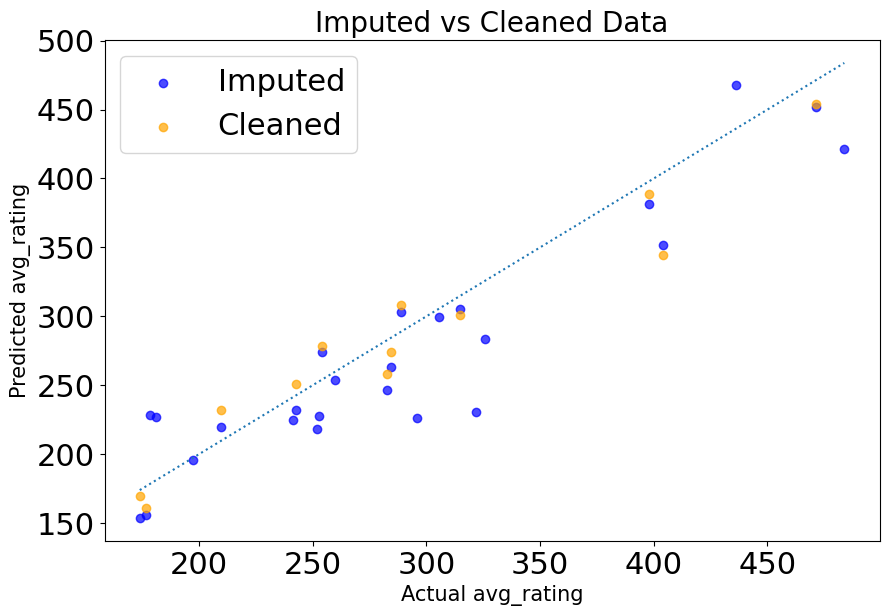

In [13]:
import matplotlib.pyplot as plt

figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})

y_pred_impute = ppll_median.predict(x_test)
y_pred_drop = pp_drop.predict(x_test_drop)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, y_pred_impute, color='blue', label='Imputed', alpha=0.7)
ax.scatter(y_test_drop, y_pred_drop, color='orange', label='Cleaned', alpha=0.7)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ':')
ax.set_title('Imputed vs Cleaned Data', fontsize=20)
ax.set_xlabel('Actual avg_rating', fontsize=15)
ax.set_ylabel('Predicted avg_rating', fontsize=15)

ax.legend()
plt.show()

## Also, by looking at the scatter plot, data points of cleaned data(orange data points) are more close to the fit line. The data points of the median imputed data(blue data points) shows a looser fit where data points kind of far from the fit line compare to orange data points.

## I think the amount of missing data can influence the difference. If the number of missing data increase, there will be larger difference between imputed data and cleaned data becuase imputation may introduce more variance or noise to the data.



# Part 2

## 2.1

In [14]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_sample_data_missing_vals_alt.csv', index_col = 0)
d.head()
d.columns
print('list of columns name:',d.columns)
print(d.head())

list of columns name: Index(['weight_kg', 'overall_length_mm', 'price', 'avg_rating'], dtype='object')
   weight_kg  overall_length_mm      price  avg_rating
0   3.143428           1.490927   2.895001    6.400798
1  10.237233           9.644184   9.635325   30.665897
2  10.547104          11.105189        NaN   36.543178
3  10.655396          10.214400        NaN   33.211331
4   9.180312                NaN  12.319402   30.861946


## 2.2

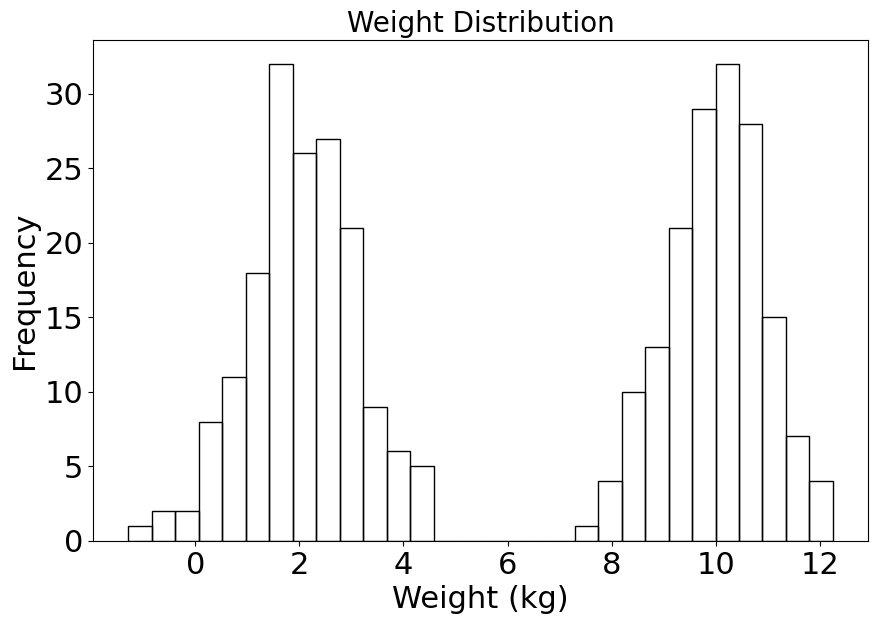

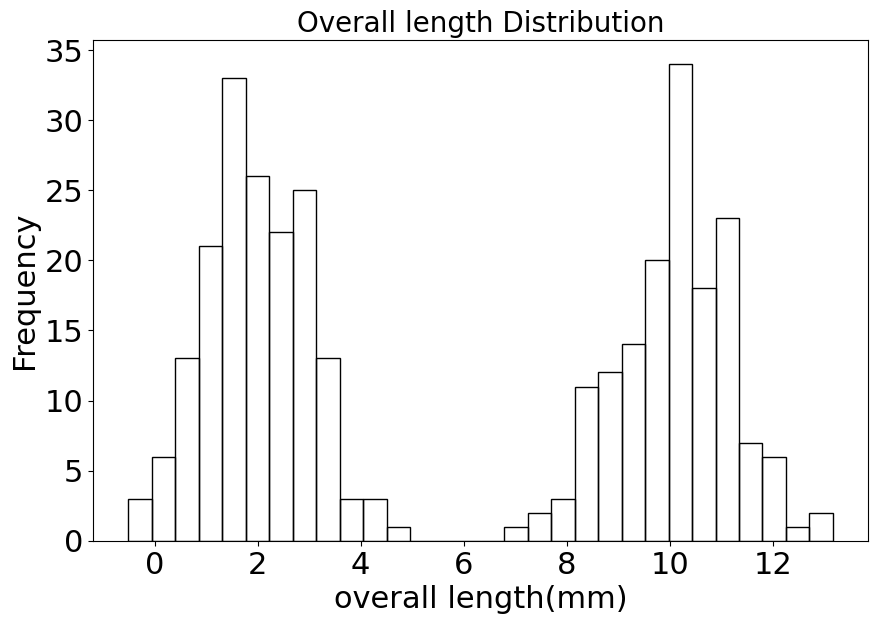

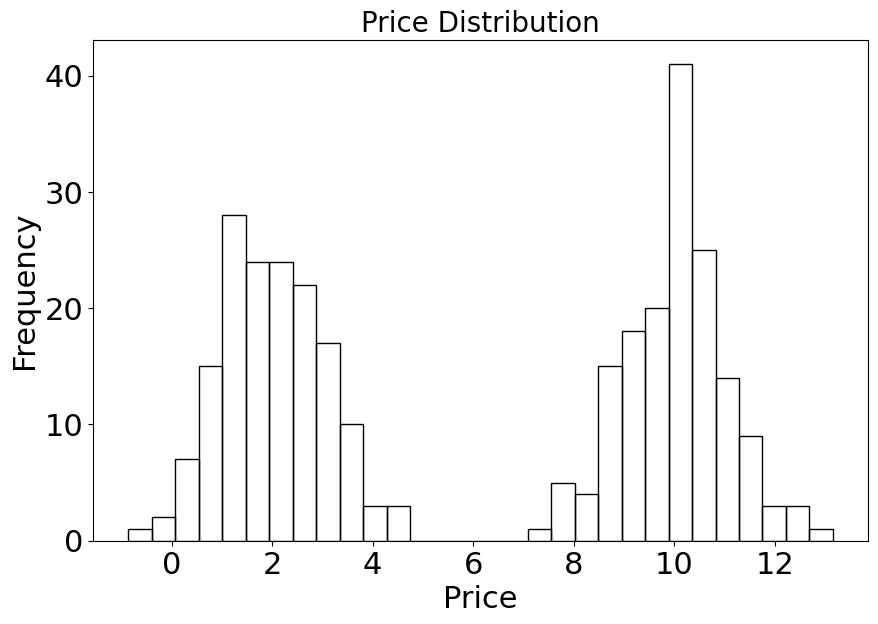

In [16]:
import matplotlib.pyplot as plt

figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})
#weight
fig, ax = plt.subplots(figsize=figsize)
ax.hist(d['weight_kg'], bins=30, edgecolor='black', fill=False)
ax.set_title('Weight Distribution', fontsize=20)
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Frequency')
plt.show()
#length
fig, ax = plt.subplots(figsize=figsize)
ax.hist(d['overall_length_mm'], bins=30, edgecolor='black', fill=False)
ax.set_title('Overall length Distribution', fontsize=20)
ax.set_xlabel('overall length(mm)')
ax.set_ylabel('Frequency')
plt.show()
#price
fig, ax = plt.subplots(figsize=figsize)
ax.hist(d['price'], bins=30, edgecolor='black', fill=False)
ax.set_title('Price Distribution', fontsize=20)
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.show()

## 2.3

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(5)
fit_data, test_data = train_test_split(d, test_size = 0.25)
print('fit data shape:',fit_data.shape)
print('test data shape:',test_data.shape)
print(fit_data.head())
print(test_data.head())

fit data shape: (300, 4)
test data shape: (100, 4)
     weight_kg  overall_length_mm      price  avg_rating
24    4.325210           1.801515   2.568273    7.182859
33   -0.386698           3.222171        NaN    2.122369
396  11.000112                NaN  10.808201   35.646395
273   8.257368           7.931105   8.977797   24.799938
246        NaN           9.551857   9.584748   27.108233
     weight_kg  overall_length_mm      price  avg_rating
218   0.685760           2.336298   1.238378    2.804776
191   7.842828                NaN   8.679602   29.061784
117   9.423665          10.612728  12.231972   33.374250
50    9.784913           8.161242  10.364909   27.450127
348   1.426784           2.249817   3.147202    0.651032


## 2.4

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

x_fit = fit_data.drop(columns=['avg_rating'])
y_fit = fit_data['avg_rating']

x_test = test_data.drop(columns=['avg_rating'])
y_test = test_data['avg_rating']

#mean
ppl_mean = Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler()),('ridge', Ridge())])
ppl_mean.fit(x_fit, y_fit)
print('score_mean: ', ppl_mean.score(x_test, y_test))

#KNN
ppl_knn = Pipeline([('imputer', KNNImputer(n_neighbors=5)),('scaler', StandardScaler()),('ridge', Ridge())])
ppl_knn.fit(x_fit, y_fit)
print('score_knn:', ppl_knn.score(x_test, y_test))

score_mean:  0.8795863933075818
score_knn: 0.9306285755876325


## 2.5

mean imputation score: 0.8795863933075818
KNN imputation score: 0.9306285755876325


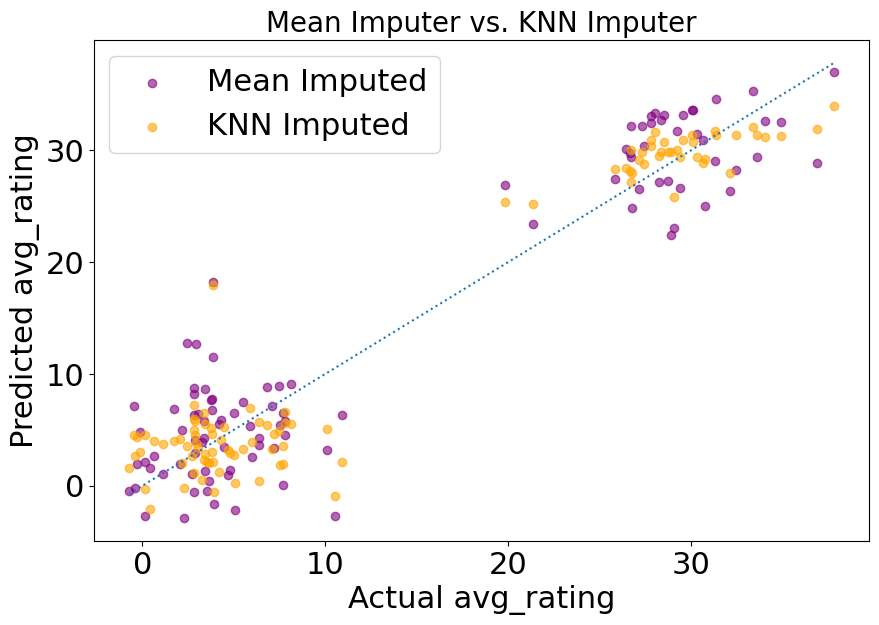

In [19]:
import matplotlib.pyplot as plt

print('mean imputation score:', ppl_mean.score(x_test, y_test))
print('KNN imputation score:', ppl_knn.score(x_test, y_test))

figsize = (10, 6.5)
plt.rcParams.update({'font.size': 22})

y_pred_mean = ppl_mean.predict(x_test)
y_pred_knn = ppl_knn.predict(x_test)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, y_pred_mean, color='purple', label='Mean Imputed', alpha=0.6)
ax.scatter(y_test, y_pred_knn, color='orange', label='KNN Imputed',alpha=0.6)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ':')
ax.set_title('Mean Imputer vs. KNN Imputer', fontsize=20)
ax.set_xlabel('Actual avg_rating')
ax.set_ylabel('Predicted avg_rating')
ax.legend()
plt.show()

## Based on the scatter plot, purple data points represent for mean imputed datas, and orange data points are KNN datas. The fit score of mean imputed datas is 0.8 and fit score of KNN imputed datas are 0.9. KNN imputed have better fit than mean imputed data based on the fitting score. By looking at scatter plots, orange data points are more close to the fit line compare to purple data points. Purple data points are scatter than orange data points.
## KNN imputed data perform well than mean imputed datas becuase KNN imputation estimate missing datas by reflecting the vlaue of other features in the dataset(price, length, and weight). KNN imputation predict the missing value based on the distribution of other features, so it's more accurate. Mean imputation method just replace the missing value by the with average, it didn't make prediction based on the distribution and relationship between each features, so the prediction is less accurate than KNN imputation.